In [1]:
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
%matplotlib inline

In [3]:
from_beginning = pandas.DataFrame.from_csv(r"D:\owncloud\bachelor\2d2e0a9e-9097-11e6-93d4-901b0e5162b8.csv")

In [4]:
# First 5
from_beginning.iloc[:5]

,avg_loss,epoch,epsilon,fps,frames_played,nr_training_sessions,reward
0,2120.745280,1,0.500000,42.352941,720,9,16.7
1,2117.487891,2,0.499437,57.142857,400,5,14.2
2,2109.851501,3,0.498875,101.538462,7920,99,58.3
3,2100.572215,4,0.498312,49.230769,1920,24,14.1
4,2093.240414,5,0.497750,50.126582,7920,99,36.7


In [5]:
# Last 5
from_beginning.iloc[-5:]

,avg_loss,epoch,epsilon,fps,frames_played,nr_training_sessions,reward
7646,1510.824554,7647,0.05,53.333333,320,4,16.7
7647,1510.821899,7648,0.05,57.142857,400,5,16.2
7648,1510.818530,7649,0.05,66.666667,400,5,16.1
7649,1510.815405,7650,0.05,66.666667,400,5,16.5
7650,1510.789179,7651,0.05,47.552448,6800,85,104.6


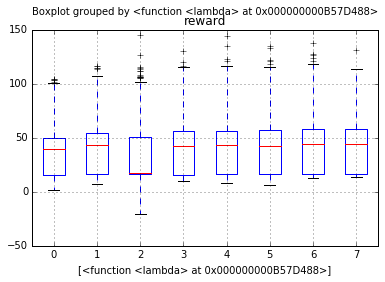

In [6]:
from_beginning.boxplot(column="reward",by=[lambda line:int(line/1000)])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9FD7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC5ECC0>]], dtype=object)

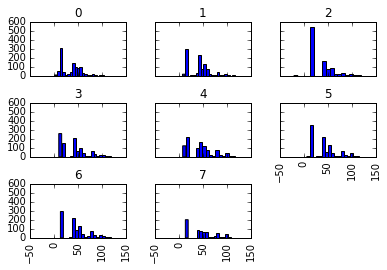

In [7]:
from_beginning.hist(column="reward",by=[lambda line:int(line/1000)],sharex =True,sharey=True, bins= 20)

In [8]:
df = pandas.DataFrame.from_csv(r"D:\owncloud\bachelor\0b50defe-985f-11e6-bf89-901b0e5162b8_final.csv")

In [9]:
df.iloc[:10]

,avg_loss,epoch,epsilon,fps,frames_played,nr_training_sessions,reward
0,1107.893457,1,0.05,200.000000,800,10,54.3
1,1107.443830,2,0.05,630.031817,560,7,21.8
2,1106.639814,3,0.05,1120.000000,1120,14,70.4
3,1104.676697,4,0.05,640.000000,2560,32,81.3
4,1102.696368,5,0.05,1120.000000,1120,14,99.5
5,1101.804339,6,0.05,618.024463,560,7,22.3
6,1101.214216,7,0.05,582.807592,560,7,22.0
7,1100.628174,8,0.05,560.000000,560,7,22.4
8,1099.922827,9,0.05,800.000000,800,10,52.2
9,1099.141412,10,0.05,720.000000,720,9,51.3


In [10]:
df.iloc[-10:]

,avg_loss,epoch,epsilon,fps,frames_played,nr_training_sessions,reward
226424,518.550999,226425,0.05,560.000000,560,7,21.4
226425,518.550877,226426,0.05,560.000000,560,7,22.3
226426,518.551069,226427,0.05,560.000000,560,7,21.4
226427,518.551223,226428,0.05,1040.000000,1040,13,57.8
226428,518.550393,226429,0.05,880.000000,880,11,54.3
226429,518.550947,226430,0.05,587.914165,560,7,21.6
226430,518.550245,226431,0.05,760.000000,1520,19,70.2
226431,518.550232,226432,0.05,570.164900,560,7,21.4
226432,518.550058,226433,0.05,560.000000,560,7,21.4
226433,518.549840,226434,0.05,560.000000,560,7,21.4


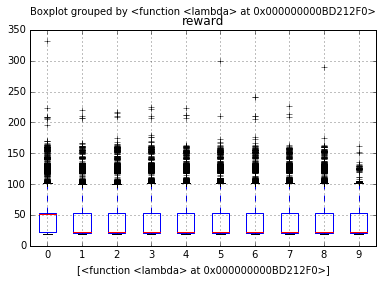

In [11]:
df.boxplot(column="reward",by=[lambda line:int(line/25000)])

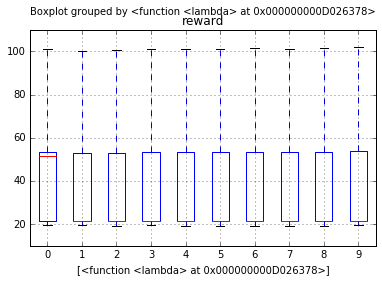

In [12]:
df.boxplot(column="reward",by=[lambda line:int(line/25000)], showfliers=False )

0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
7    Axes(0.125,0.125;0.775x0.775)
8    Axes(0.125,0.125;0.775x0.775)
9    Axes(0.125,0.125;0.775x0.775)
Name: reward, dtype: object

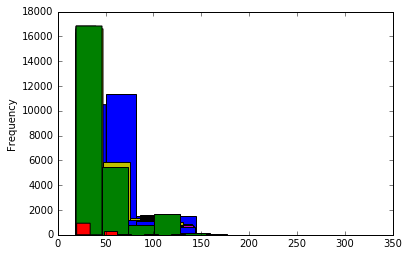

In [13]:
df["reward"].groupby(by=lambda line:int(line/25000)).plot(kind="hist",subplots =False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD53860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FE2AE48>]], dtype=object)

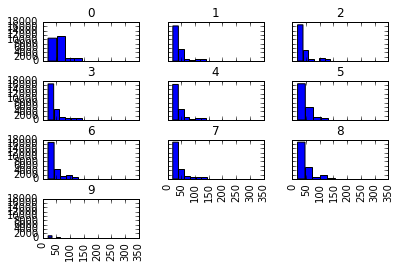

In [14]:
df.hist(column="reward",by=[lambda line:int(line/25000)],sharex =True,sharey=True)

In [17]:
regression = sm.OLS(from_beginning["epoch"],from_beginning["reward"])

In [18]:
result = regression.fit()

In [19]:
result.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>          <td>epoch</td>      <th>  R-squared:         </th> <td>   0.603</td> 
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.603</td> 
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>1.160e+04</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 10 Nov 2016</td> <th>  Prob (F-statistic):</th>  <td>  0.00</td>  
</tr>
<tr>
  <th>Time:</th>                 <td>00:11:02</td>     <th>  Log-Likelihood:    </th> <td> -71543.</td> 
</tr>
<tr>
  <th>No. Observations:</th>      <td>  7651</td>      <th>  AIC:               </th> <td>1.431e+05</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>  7650</td>      <th>  BIC:               </th> <td>1.431e+05</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     1</td>      <th>                     </th>     <td> </td>    
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>    
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>reward</th> <td>   69.4341</td> <td>    0.645</td> <td>  107.716</td> <td> 0.000</td> <td>   68.170</td> <td>   70.698</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>202.486</td> <th>  Durbin-Watson:     </th> <td>   0.776</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td>  <th>  Jarque-Bera (JB):  </th> <td> 106.317</td>
</tr>
<tr>
  <th>Skew:</th>          <td>-0.083</td>  <th>  Prob(JB):          </th> <td>8.19e-24</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 2.447</td>  <th>  Cond. No.          </th> <td>    1.00</td>
</tr>
</table>

In [20]:
result.params

reward    69.434087
dtype: float64

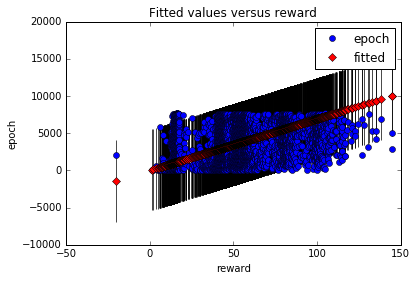

In [21]:
plotfig= sm.graphics.plot_fit(result,0)

In [15]:
model = pandas.ols(y=df['reward'],x=df['epoch'])

D:\etc\WinPython-64bit-3.4.4.3Qt5\python-3.4.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:2869: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
trend = model.predict(x=df['epoch'])

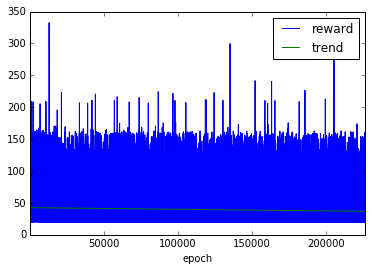

In [17]:
pandas.DataFrame(index=df['epoch'], data={'reward': df['reward'], 'trend': trend}).plot()